In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

/opt/homebrew/Caskroom/miniforge/base/envs/elec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import to_upward

In [5]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final2.csv")

In [6]:
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = to_upward.pad_str(str_list, target_len)

data.Code = padded_str_list

In [7]:
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220904 20230904


In [8]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [9]:
stocks = recommendation["Name"].to_list()

In [10]:
tmp = to_upward.get_close(data,stocks,start,end)
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
2022-09-08,55600,90400,241500,644000,200000,80900,93800,20000,337500,80900,419500,72100,304500
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500
2023-08-31,66900,121800,579000,583000,189100,80200,98500,16660,270000,103300,452000,117600,331000


In [11]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

# 최대 Shape 예시

In [12]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]
rf = 0.0325

In [13]:
max_shape,min_risk,tmp2,df =to_upward.get_portfolio(stocks,annual_ret,annual_cov)

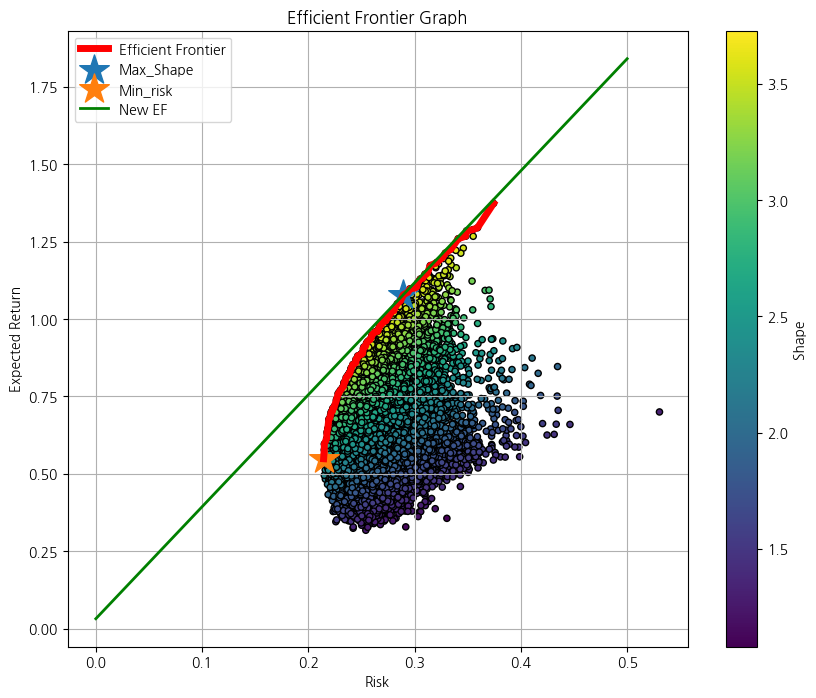

In [14]:
to_upward.show_CAPM(df,tmp2,max_shape,min_risk,rf=rf)

In [15]:
to_upward.show_portfolio(max_shape)

채권의 비중 : 0.6408439349245295
이 경우 Risk : 0.10387543212202091


In [16]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
2628,562583.117134,100729.097924,122827.429406,209911.941468,3948.414068


In [17]:
sim_num = 1000
balance_df = to_upward.monte_sim(sim_num,tmp,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,984958.349626,9.843695e+05,1.006679e+06,1.000969e+06,9.855598e+05,1.001079e+06,1.011863e+06,1.036333e+06,9.701802e+05,9.883689e+05,...,1.003971e+06,1.002255e+06,1.031770e+06,1.031120e+06,1.005005e+06,1.010636e+06,1.002402e+06,1.009345e+06,1.007909e+06,1.023266e+06
2,994422.609670,9.902000e+05,1.006033e+06,9.501361e+05,9.909827e+05,9.937179e+05,1.008400e+06,1.049358e+06,9.953117e+05,1.001169e+06,...,1.024016e+06,1.016648e+06,1.050809e+06,1.033147e+06,9.929085e+05,1.022311e+06,9.828534e+05,9.963602e+05,1.027933e+06,9.947268e+05
3,983635.711788,9.897272e+05,9.936971e+05,9.399282e+05,1.024071e+06,9.800089e+05,1.029291e+06,1.069499e+06,9.930776e+05,1.003552e+06,...,1.018168e+06,1.028143e+06,1.088319e+06,1.042273e+06,9.725616e+05,1.042523e+06,9.846385e+05,1.004713e+06,1.024697e+06,9.924959e+05
4,963992.914278,9.848819e+05,9.874338e+05,9.266171e+05,1.013724e+06,9.832619e+05,1.013015e+06,1.080920e+06,9.649949e+05,1.000761e+06,...,1.037118e+06,1.034982e+06,1.105244e+06,1.033310e+06,9.806486e+05,1.036122e+06,9.953078e+05,9.862113e+05,1.041713e+06,1.004488e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,811499.312031,1.113939e+06,1.402458e+06,9.586694e+05,1.161517e+06,9.433496e+05,1.083589e+06,1.232613e+06,1.002091e+06,8.589735e+05,...,8.993006e+05,9.362642e+05,1.225562e+06,9.531826e+05,1.022672e+06,1.198069e+06,1.237401e+06,1.057219e+06,9.630910e+05,1.099626e+06
96,828728.395271,1.114631e+06,1.423620e+06,9.559393e+05,1.172611e+06,9.594898e+05,1.087765e+06,1.226486e+06,1.016804e+06,8.405439e+05,...,8.877638e+05,9.249455e+05,1.223858e+06,9.382244e+05,1.015543e+06,1.225630e+06,1.206686e+06,1.085436e+06,9.398082e+05,1.078996e+06
97,818002.842403,1.127442e+06,1.396239e+06,9.735998e+05,1.182316e+06,9.787876e+05,1.091005e+06,1.216866e+06,1.035700e+06,8.433393e+05,...,8.924041e+05,9.381662e+05,1.220519e+06,9.615353e+05,1.009848e+06,1.231725e+06,1.214676e+06,1.073853e+06,9.164961e+05,1.104316e+06
98,835859.025231,1.120876e+06,1.407454e+06,9.683552e+05,1.203655e+06,1.001451e+06,1.097671e+06,1.207904e+06,1.034570e+06,8.308180e+05,...,8.676451e+05,9.545222e+05,1.187660e+06,9.850336e+05,9.995873e+05,1.253930e+06,1.187108e+06,1.040643e+06,9.361875e+05,1.084399e+06


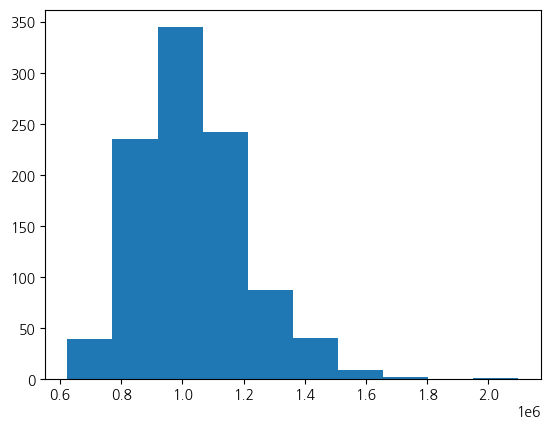

In [18]:
plt.hist(balance_df.iloc[99])
plt.show()

In [19]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') 
pd.DataFrame(balance_df.iloc[99].quantile([0.5,0.9]).to_numpy(),columns=['포트폴리오가치'],index=['50%','90%'])

,포트폴리오가치
50%,"1,013,120.39"
90%,"1,265,198.17"


In [20]:
to_upward.get_simret(balance_df,balance)

,10.0%,25.0%,50.0%,75.0%,90.0%
1month,9.92,-2.30,-2.70,1.08,1.89
2month,12.11,4.98,0.58,4.22,-3.44
3month,11.90,-1.51,9.89,0.24,-13.07
4month,11.70,-3.20,1.03,-7.78,-17.80
5month,26.66,13.10,1.31,-9.01,-16.52
